In [1]:
import pandas as pd
import os
import glob
import numpy as np

In [2]:
interp_files = "../assets/census/derivedVariables/interpolatedDataByYear/"

In [3]:
file_pattern = interp_files + '/**/*'

In [4]:
all_files = [file.replace('\\','/') for file in glob.glob(file_pattern, recursive=True) if file.endswith('.csv')]

In [48]:
df = pd.DataFrame()
for file in all_files:
    temp_df = pd.read_csv(file)
    temp_df['census_var'] = file.split('/')[-1].replace('.csv','')
    df = pd.concat([df, temp_df])
df = df.reset_index(drop=True)
df.loc[df['census_var'].str.contains('B19013'),[str(i) for i in range(2000,2022)]] = df.loc[df['census_var'].str.contains('B19013'),[str(i) for i in range(2000,2022)]].mask(df.loc[df['census_var'].str.contains('B19013'),[str(i) for i in range(2000,2022)]] < 0, np.nan)
df.loc[df['census_var'].str.contains('B19013')]


,PAT_ZIP,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,census_var
459543,73949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B19013B_001E
459544,75001,48233.0,48189.0,48145.0,48101.0,48057.0,48013.0,47970.0,47926.0,47882.0,...,49094.0,49767.0,50439.0,51111.0,52903.0,54695.0,56488.0,58280.0,60072.0,B19013B_001E
459545,75002,63393.0,64597.0,65801.0,67004.0,68208.0,69412.0,70616.0,71820.0,73024.0,...,76695.0,76726.0,76756.0,76786.0,79507.0,82227.0,84948.0,87668.0,90389.0,B19013B_001E
459546,75006,53550.0,53080.0,52609.0,52139.0,51668.0,51198.0,50727.0,50257.0,49786.0,...,45455.0,43995.0,42535.0,41075.0,44769.0,48462.0,52156.0,55849.0,59543.0,B19013B_001E
459547,75007,57102.0,56872.0,56642.0,56412.0,56182.0,55952.0,55722.0,55492.0,55262.0,...,57258.0,58600.0,59943.0,61286.0,60978.0,60669.0,60361.0,60052.0,59744.0,B19013B_001E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476989,79911,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,...,117577.0,105870.0,94162.0,82455.0,87975.0,93495.0,99014.0,104534.0,110054.0,B19013A_001E
476990,79916,25526.0,25526.0,25526.0,25526.0,25526.0,25526.0,25526.0,25526.0,25526.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B19013A_001E
476991,79920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B19013A_001E
476992,79928,45184.0,45184.0,45184.0,45184.0,45184.0,45184.0,45184.0,45184.0,45184.0,...,46965.0,47856.0,48746.0,49637.0,52617.0,55597.0,58578.0,61558.0,64538.0,B19013A_001E


In [71]:
start_year = 2005
end_year = 2022
hospital_quarters = [f"{year}q{quarter}" for year in range(start_year, end_year + 1) for quarter in range(1, 5) if not (year == end_year and quarter > 2)]
hospital_quarters = hospital_quarters[:-1]
hospital_years = sorted(list(set([i[:4] for i in hospital_quarters])))
# hospital_quarters

In [76]:
nice_names = {
    'A': 'alpha',
    'B': 'beta'
}

In [77]:
names = ['A','B','C']

In [81]:
[nice_names[i] if i in nice_names.keys() else i for i in names]

['alpha', 'beta', 'C']

In [75]:
hospital_quarters[0][:4]

'2005'

In [31]:
len(df)

598934

In [49]:
df = df.dropna()
df

,PAT_ZIP,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,census_var
0,73949,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,...,0.1500,0.1500,0.1500,0.1500,0.1262,0.1024,0.0785,0.0547,0.0309,B01001H_011E
1,75001,0.1982,0.1953,0.1924,0.1895,0.1867,0.1838,0.1809,0.1780,0.1751,...,0.1543,0.1482,0.1422,0.1361,0.1547,0.1733,0.1919,0.2105,0.2291,B01001H_011E
2,75002,0.2287,0.2244,0.2202,0.2159,0.2117,0.2074,0.2031,0.1989,0.1946,...,0.1760,0.1730,0.1700,0.1671,0.1580,0.1488,0.1397,0.1305,0.1214,B01001H_011E
3,75006,0.1882,0.1839,0.1796,0.1754,0.1711,0.1668,0.1625,0.1582,0.1540,...,0.1231,0.1141,0.1051,0.0961,0.1084,0.1206,0.1329,0.1451,0.1574,B01001H_011E
4,75007,0.2281,0.2203,0.2124,0.2046,0.1967,0.1889,0.1810,0.1731,0.1653,...,0.1302,0.1245,0.1187,0.1130,0.1174,0.1217,0.1261,0.1304,0.1348,B01001H_011E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598929,79932,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0007,0.0011,0.0014,0.0018,0.0014,0.0011,0.0007,0.0004,0.0000,B02001_006E
598930,79934,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,...,0.0022,0.0028,0.0034,0.0041,0.0037,0.0033,0.0029,0.0025,0.0022,B02001_006E
598931,79935,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,...,0.0007,0.0005,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,B02001_006E
598932,79936,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0004,0.0006,0.0008,0.0010,0.0014,0.0018,0.0022,0.0026,0.0029,B02001_006E


In [33]:
df.loc[df['census_var'].str.contains('B19013')]

,PAT_ZIP,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,census_var
459544,75001,48233.0,48189.0,48145.0,48101.0,48057.0,48013.0,47970.0,47926.0,47882.0,...,49094.0,49767.0,50439.0,51111.0,52903.0,54695.0,56488.0,58280.0,60072.0,B19013B_001E
459545,75002,63393.0,64597.0,65801.0,67004.0,68208.0,69412.0,70616.0,71820.0,73024.0,...,76695.0,76726.0,76756.0,76786.0,79507.0,82227.0,84948.0,87668.0,90389.0,B19013B_001E
459546,75006,53550.0,53080.0,52609.0,52139.0,51668.0,51198.0,50727.0,50257.0,49786.0,...,45455.0,43995.0,42535.0,41075.0,44769.0,48462.0,52156.0,55849.0,59543.0,B19013B_001E
459547,75007,57102.0,56872.0,56642.0,56412.0,56182.0,55952.0,55722.0,55492.0,55262.0,...,57258.0,58600.0,59943.0,61286.0,60978.0,60669.0,60361.0,60052.0,59744.0,B19013B_001E
459549,75010,59792.0,60896.0,61999.0,63103.0,64207.0,65310.0,66414.0,67517.0,68621.0,...,65878.0,62852.0,59825.0,56798.0,58622.0,60446.0,62270.0,64094.0,65918.0,B19013B_001E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476971,78591,46250.0,46250.0,46250.0,46250.0,46250.0,46250.0,46250.0,46250.0,46250.0,...,45594.0,45265.0,44937.0,44609.0,50291.0,55974.0,61656.0,67339.0,73021.0,B19013A_001E
476972,78633,71913.0,71913.0,71913.0,71913.0,71913.0,71913.0,71913.0,71913.0,71913.0,...,71717.0,71619.0,71521.0,71423.0,74484.0,77545.0,80606.0,83667.0,86728.0,B19013A_001E
476973,78665,87123.0,87123.0,87123.0,87123.0,87123.0,87123.0,87123.0,87123.0,87123.0,...,88841.0,89700.0,90559.0,91418.0,93697.0,95976.0,98255.0,100534.0,102813.0,B19013A_001E
476989,79911,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,140992.0,...,117577.0,105870.0,94162.0,82455.0,87975.0,93495.0,99014.0,104534.0,110054.0,B19013A_001E


In [17]:
import missingno as msno

<Axes: >

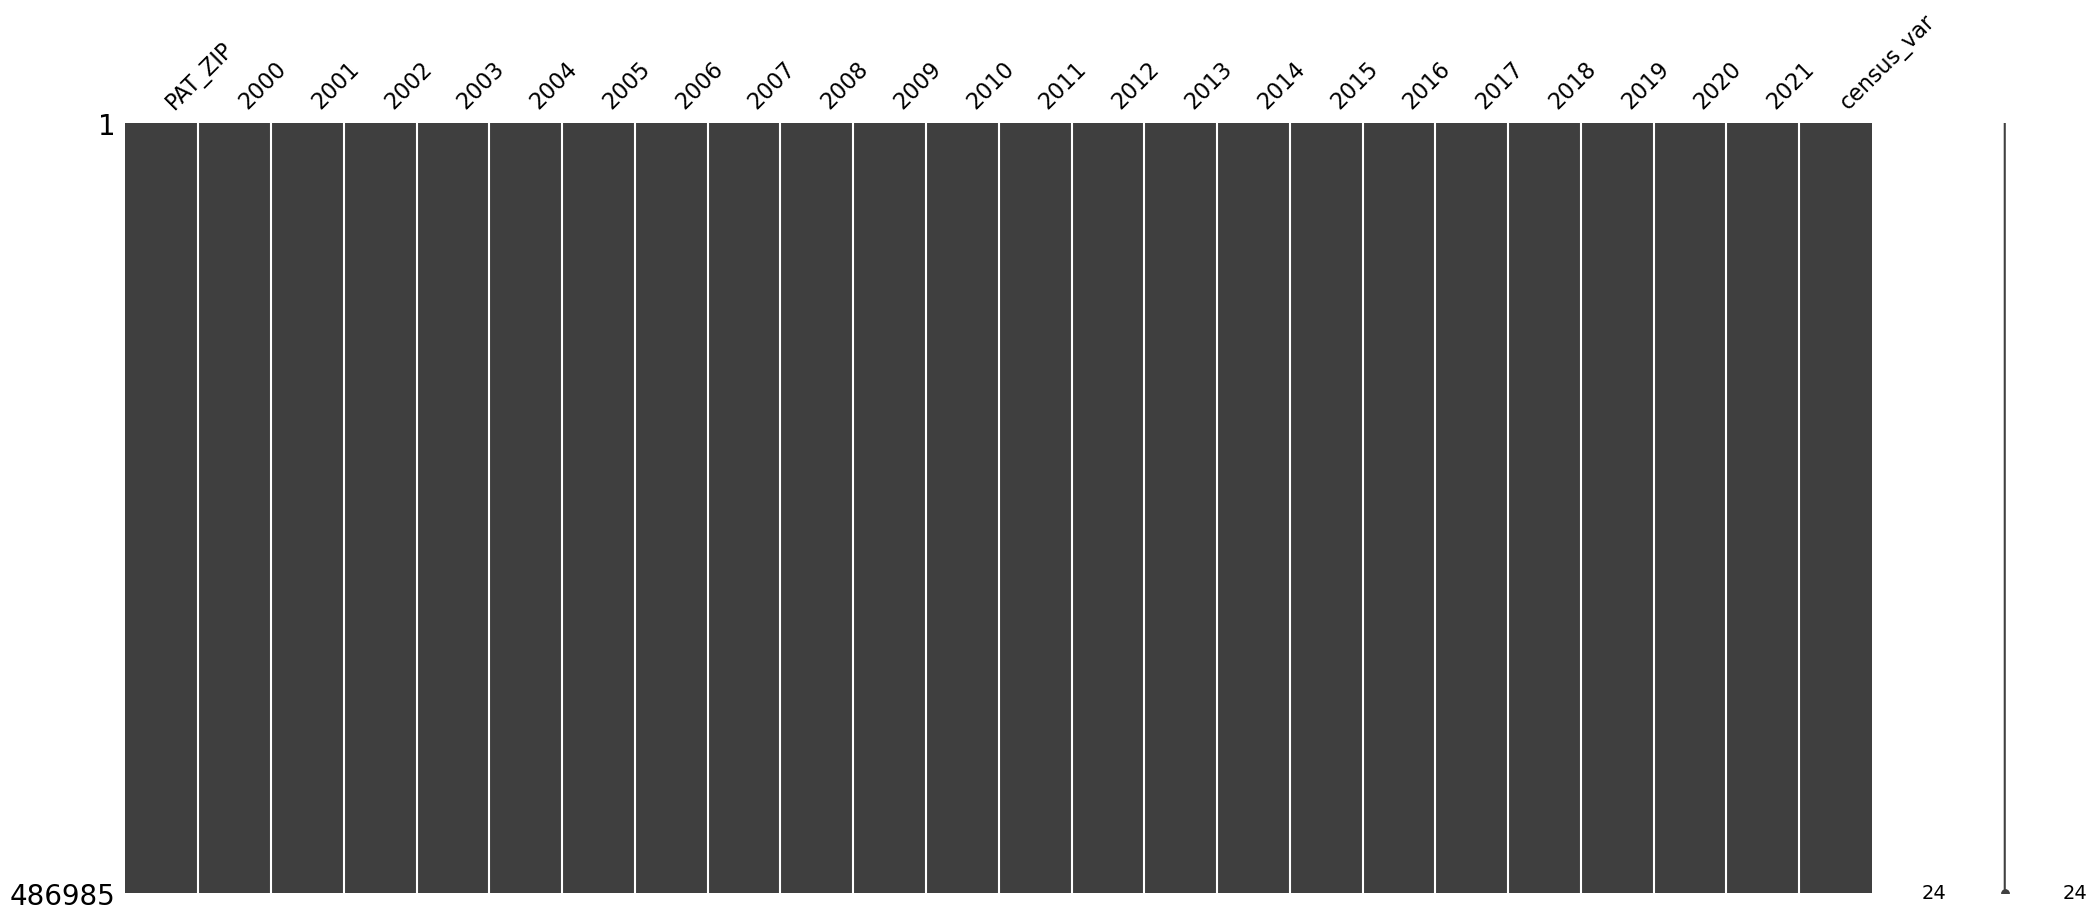

In [44]:
msno.matrix(df)

In [34]:
year = df.loc[:,['PAT_ZIP','2005','census_var']]
year.pivot(index='PAT_ZIP', columns='census_var', values='2005').reset_index()

census_var,PAT_ZIP,B01001A_003E,B01001A_004E,B01001A_005E,B01001A_006E,B01001A_007E,B01001A_008E,B01001A_009E,B01001A_010E,B01001A_011E,...,B17020I,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E
0,73949,0.0818,0.0855,0.1050,0.0501,0.0403,0.0293,0.0574,0.0562,0.1526,...,0.2649,34583.0,NaN,NaN,NaN,NaN,25625.0,17917.0,33988.0,27813.0
1,75001,0.0683,0.0236,0.0194,0.0096,0.0080,0.0899,0.1910,0.1492,0.1690,...,0.1883,59299.0,48013.0,NaN,57184.0,NaN,43682.0,47963.0,62494.0,39681.0
2,75002,0.0877,0.0973,0.0960,0.0510,0.0230,0.0333,0.0564,0.0813,0.2046,...,0.0541,83288.0,69412.0,NaN,83090.0,NaN,67940.0,71031.0,85018.0,64956.0
3,75006,0.0734,0.0699,0.0625,0.0453,0.0290,0.0719,0.0873,0.0824,0.1615,...,0.2006,57090.0,51198.0,64562.0,50340.0,NaN,40124.0,59748.0,63597.0,40753.0
4,75007,0.0655,0.0682,0.0804,0.0501,0.0214,0.0504,0.0635,0.0753,0.1895,...,0.0808,79119.0,55952.0,NaN,60425.0,NaN,62845.0,58528.0,82305.0,60685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,79936,0.0912,0.1072,0.1061,0.0600,0.0313,0.0714,0.0651,0.0737,0.1562,...,0.1526,47967.0,52782.0,NaN,50938.0,NaN,38243.0,43643.0,58255.0,43708.0
1921,79938,0.0825,0.0957,0.0982,0.0552,0.0443,0.1215,0.0792,0.0832,0.1669,...,0.2400,36815.0,63920.0,6534.0,54773.0,NaN,36001.0,44747.0,44717.0,35970.0
1922,88063,0.0897,0.1238,0.1147,0.0672,0.0484,0.0870,0.0529,0.0441,0.1262,...,0.3822,19924.0,NaN,NaN,NaN,NaN,20059.0,26250.0,23214.0,20013.0
1923,88220,0.0651,0.0779,0.0792,0.0448,0.0311,0.0464,0.0519,0.0479,0.1562,...,0.2292,34454.0,21786.0,12019.0,41071.0,NaN,28212.0,36875.0,37170.0,26756.0


In [37]:
import geopandas as gpd

zip_2010 = "../assets/tx_texas_zip_codes_geo.min.json"
tx_zip = gpd.read_file(zip_2010)


In [58]:
tx_zip = tx_zip.rename(columns={
    'ZCTA5CE10': 'PAT_ZIP'
})
tx_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   1939 non-null   object  
 1   PAT_ZIP     1939 non-null   object  
 2   GEOID10     1939 non-null   object  
 3   CLASSFP10   1939 non-null   object  
 4   MTFCC10     1939 non-null   object  
 5   FUNCSTAT10  1939 non-null   object  
 6   ALAND10     1939 non-null   int64   
 7   AWATER10    1939 non-null   int64   
 8   INTPTLAT10  1939 non-null   object  
 9   INTPTLON10  1939 non-null   object  
 10  PARTFLG10   1939 non-null   object  
 11  geometry    1939 non-null   geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 181.9+ KB


In [60]:
df['PAT_ZIP'] = df['PAT_ZIP'].astype(str)

In [61]:
tx_zip['PAT_ZIP'] = tx_zip['PAT_ZIP'].astype(str)

In [62]:
df_data = pd.DataFrame()
for quarter in hospital_quarters[:-1]: # [:-1] to avoid 2022q1 

    census_year = df.loc[:,['PAT_ZIP',quarter[:4],'census_var']]
    # print(census_year)
    year_pivot = census_year.pivot(index='PAT_ZIP', columns='census_var', values=quarter[:4]).reset_index()
    print(year_pivot)

    # census_df = census_data[census_data['year'] == quarter[:4]]
    # env_icd = env_df.merge(icd_df, on='PAT_ZIP')


    full_df = year_pivot.merge(tx_zip['PAT_ZIP'], on='PAT_ZIP')

    df_data = pd.concat([df_data, full_df])
    
print(df_data.isna().sum())
print(df_data)

census_var PAT_ZIP  B01001A_003E  B01001A_004E  B01001A_005E  B01001A_006E  \
0            73949        0.0818        0.0855        0.1050        0.0501   
1            75001        0.0683        0.0236        0.0194        0.0096   
2            75002        0.0877        0.0973        0.0960        0.0510   
3            75006        0.0734        0.0699        0.0625        0.0453   
4            75007        0.0655        0.0682        0.0804        0.0501   
...            ...           ...           ...           ...           ...   
1920         79936        0.0912        0.1072        0.1061        0.0600   
1921         79938        0.0825        0.0957        0.0982        0.0552   
1922         88063        0.0897        0.1238        0.1147        0.0672   
1923         88220        0.0651        0.0779        0.0792        0.0448   
1924         88430        0.0385        0.0577        0.1154        0.0769   

census_var  B01001A_007E  B01001A_008E  B01001A_009E  B01001A_0

In [65]:
df_data

,PAT_ZIP,B01001A_003E,B01001A_004E,B01001A_005E,B01001A_006E,B01001A_007E,B01001A_008E,B01001A_009E,B01001A_010E,B01001A_011E,...,B17020I,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E
0,73949,0.0818,0.0855,0.1050,0.0501,0.0403,0.0293,0.0574,0.0562,0.1526,...,0.2649,34583.0,NaN,NaN,NaN,NaN,25625.0,17917.0,33988.0,27813.0
1,75001,0.0683,0.0236,0.0194,0.0096,0.0080,0.0899,0.1910,0.1492,0.1690,...,0.1883,59299.0,48013.0,NaN,57184.0,NaN,43682.0,47963.0,62494.0,39681.0
2,75002,0.0877,0.0973,0.0960,0.0510,0.0230,0.0333,0.0564,0.0813,0.2046,...,0.0541,83288.0,69412.0,NaN,83090.0,NaN,67940.0,71031.0,85018.0,64956.0
3,75006,0.0734,0.0699,0.0625,0.0453,0.0290,0.0719,0.0873,0.0824,0.1615,...,0.2006,57090.0,51198.0,64562.0,50340.0,NaN,40124.0,59748.0,63597.0,40753.0
4,75007,0.0655,0.0682,0.0804,0.0501,0.0214,0.0504,0.0635,0.0753,0.1895,...,0.0808,79119.0,55952.0,NaN,60425.0,NaN,62845.0,58528.0,82305.0,60685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,79936,0.0484,0.0629,0.0751,0.0548,0.0383,0.1022,0.0843,0.0644,0.1154,...,0.1453,56718.0,66129.0,NaN,58958.0,NaN,62768.0,58322.0,66622.0,56698.0
1921,79938,0.1040,0.1160,0.1047,0.0516,0.0295,0.0626,0.0955,0.1004,0.1389,...,0.1360,66321.0,82083.0,110785.0,64432.0,NaN,54051.0,56923.0,73936.0,59727.0
1922,88063,0.0897,0.0832,0.0708,0.0532,0.0241,0.0523,0.0703,0.0949,0.0985,...,0.3331,23180.0,NaN,NaN,NaN,NaN,19432.0,24885.0,2499.0,23766.0
1923,88220,0.0635,0.0596,0.0798,0.0509,0.0275,0.0866,0.0633,0.0673,0.1314,...,0.1613,71984.0,70669.0,100125.0,129038.0,NaN,61500.0,71350.0,77906.0,66824.0


In [70]:
df_data

,PAT_ZIP,B01001A_003E,B01001A_004E,B01001A_005E,B01001A_006E,B01001A_007E,B01001A_008E,B01001A_009E,B01001A_010E,B01001A_011E,...,B17020I,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E
0,73949,0.0818,0.0855,0.1050,0.0501,0.0403,0.0293,0.0574,0.0562,0.1526,...,0.2649,34583.0,NaN,NaN,NaN,NaN,25625.0,17917.0,33988.0,27813.0
1,75001,0.0683,0.0236,0.0194,0.0096,0.0080,0.0899,0.1910,0.1492,0.1690,...,0.1883,59299.0,48013.0,NaN,57184.0,NaN,43682.0,47963.0,62494.0,39681.0
2,75002,0.0877,0.0973,0.0960,0.0510,0.0230,0.0333,0.0564,0.0813,0.2046,...,0.0541,83288.0,69412.0,NaN,83090.0,NaN,67940.0,71031.0,85018.0,64956.0
3,75006,0.0734,0.0699,0.0625,0.0453,0.0290,0.0719,0.0873,0.0824,0.1615,...,0.2006,57090.0,51198.0,64562.0,50340.0,NaN,40124.0,59748.0,63597.0,40753.0
4,75007,0.0655,0.0682,0.0804,0.0501,0.0214,0.0504,0.0635,0.0753,0.1895,...,0.0808,79119.0,55952.0,NaN,60425.0,NaN,62845.0,58528.0,82305.0,60685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,79936,0.0484,0.0629,0.0751,0.0548,0.0383,0.1022,0.0843,0.0644,0.1154,...,0.1453,56718.0,66129.0,NaN,58958.0,NaN,62768.0,58322.0,66622.0,56698.0
1921,79938,0.1040,0.1160,0.1047,0.0516,0.0295,0.0626,0.0955,0.1004,0.1389,...,0.1360,66321.0,82083.0,110785.0,64432.0,NaN,54051.0,56923.0,73936.0,59727.0
1922,88063,0.0897,0.0832,0.0708,0.0532,0.0241,0.0523,0.0703,0.0949,0.0985,...,0.3331,23180.0,NaN,NaN,NaN,NaN,19432.0,24885.0,2499.0,23766.0
1923,88220,0.0635,0.0596,0.0798,0.0509,0.0275,0.0866,0.0633,0.0673,0.1314,...,0.1613,71984.0,70669.0,100125.0,129038.0,NaN,61500.0,71350.0,77906.0,66824.0


<Axes: >

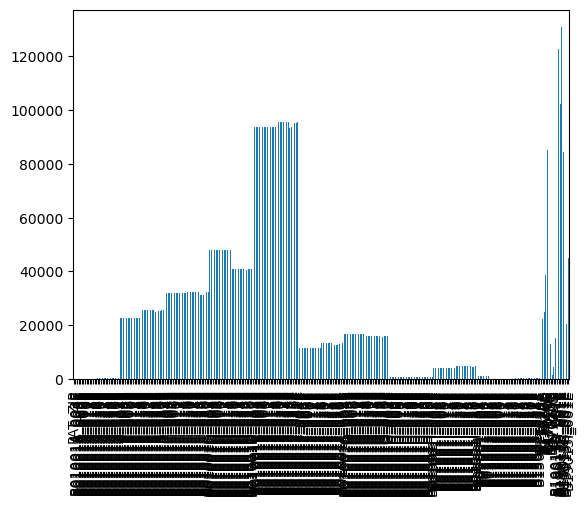

In [69]:
df_data.isna().sum().plot(kind='bar')